<h3>Ajusta a leitura de um conversor AD</h3>
Gerar rampa de leitura com CI X9C103 acoplado a um amp op LM358


In [1]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
TAMANHO_GRAFICO=(40,20)

In [2]:
# criar as tabelas de leituras do valor esperado e do vr lido
indice=np.arange(0,66)
lido=np.array([])
np.random.seed(2021)                         # rand reproduzivel

#rampa ascendente
real=np.arange(0, 3.3, 0.1)
    
# rampa descendente
red=np.arange(3.3,0,-0.1)
real=np.concatenate((real,red),axis=0)

#gera os valores lidos acrescentando um erro
for r in real:
    rand_pos=np.random.uniform(low=0, high=0.10)  # gera randomicos positivos entre o intervalo
    selecao=np.random.rand()
    erro=r*rand_pos
    if(selecao>=0.5):
        valor=r + erro
    else:
        valor=r - erro
    lido=np.append(lido,valor)


real,lido,np.shape(real)

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.2, 3.1, 3. , 2.9, 2.8,
        2.7, 2.6, 2.5, 2.4, 2.3, 2.2, 2.1, 2. , 1.9, 1.8, 1.7, 1.6, 1.5,
        1.4, 1.3, 1.2, 1.1, 1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2,
        0.1]),
 array([0.        , 0.09861053, 0.18005513, 0.30536979, 0.42648642,
        0.49515528, 0.65774376, 0.7060641 , 0.84932198, 0.84831261,
        0.95478548, 1.03737644, 1.12995552, 1.36731587, 1.2974885 ,
        1.60081934, 1.4675177 , 1.80497312, 1.85419235, 2.01203428,
        1.91155355, 1.99314551, 2.4015067 , 2.50485074, 2.24716082,
        2.2940522 , 2.5200387 , 2.77159454, 2.75670785, 3.0878081 ,
        2.98084905, 3.20299572, 3.35163114, 3.32998608, 3.4486326 ,
        3.11956203, 2.76225158, 3.00759575, 2.9900441 , 2.58734055,
        2.50320294, 2.6698889 , 2.16715229, 2.37601249, 2.01830221,
        

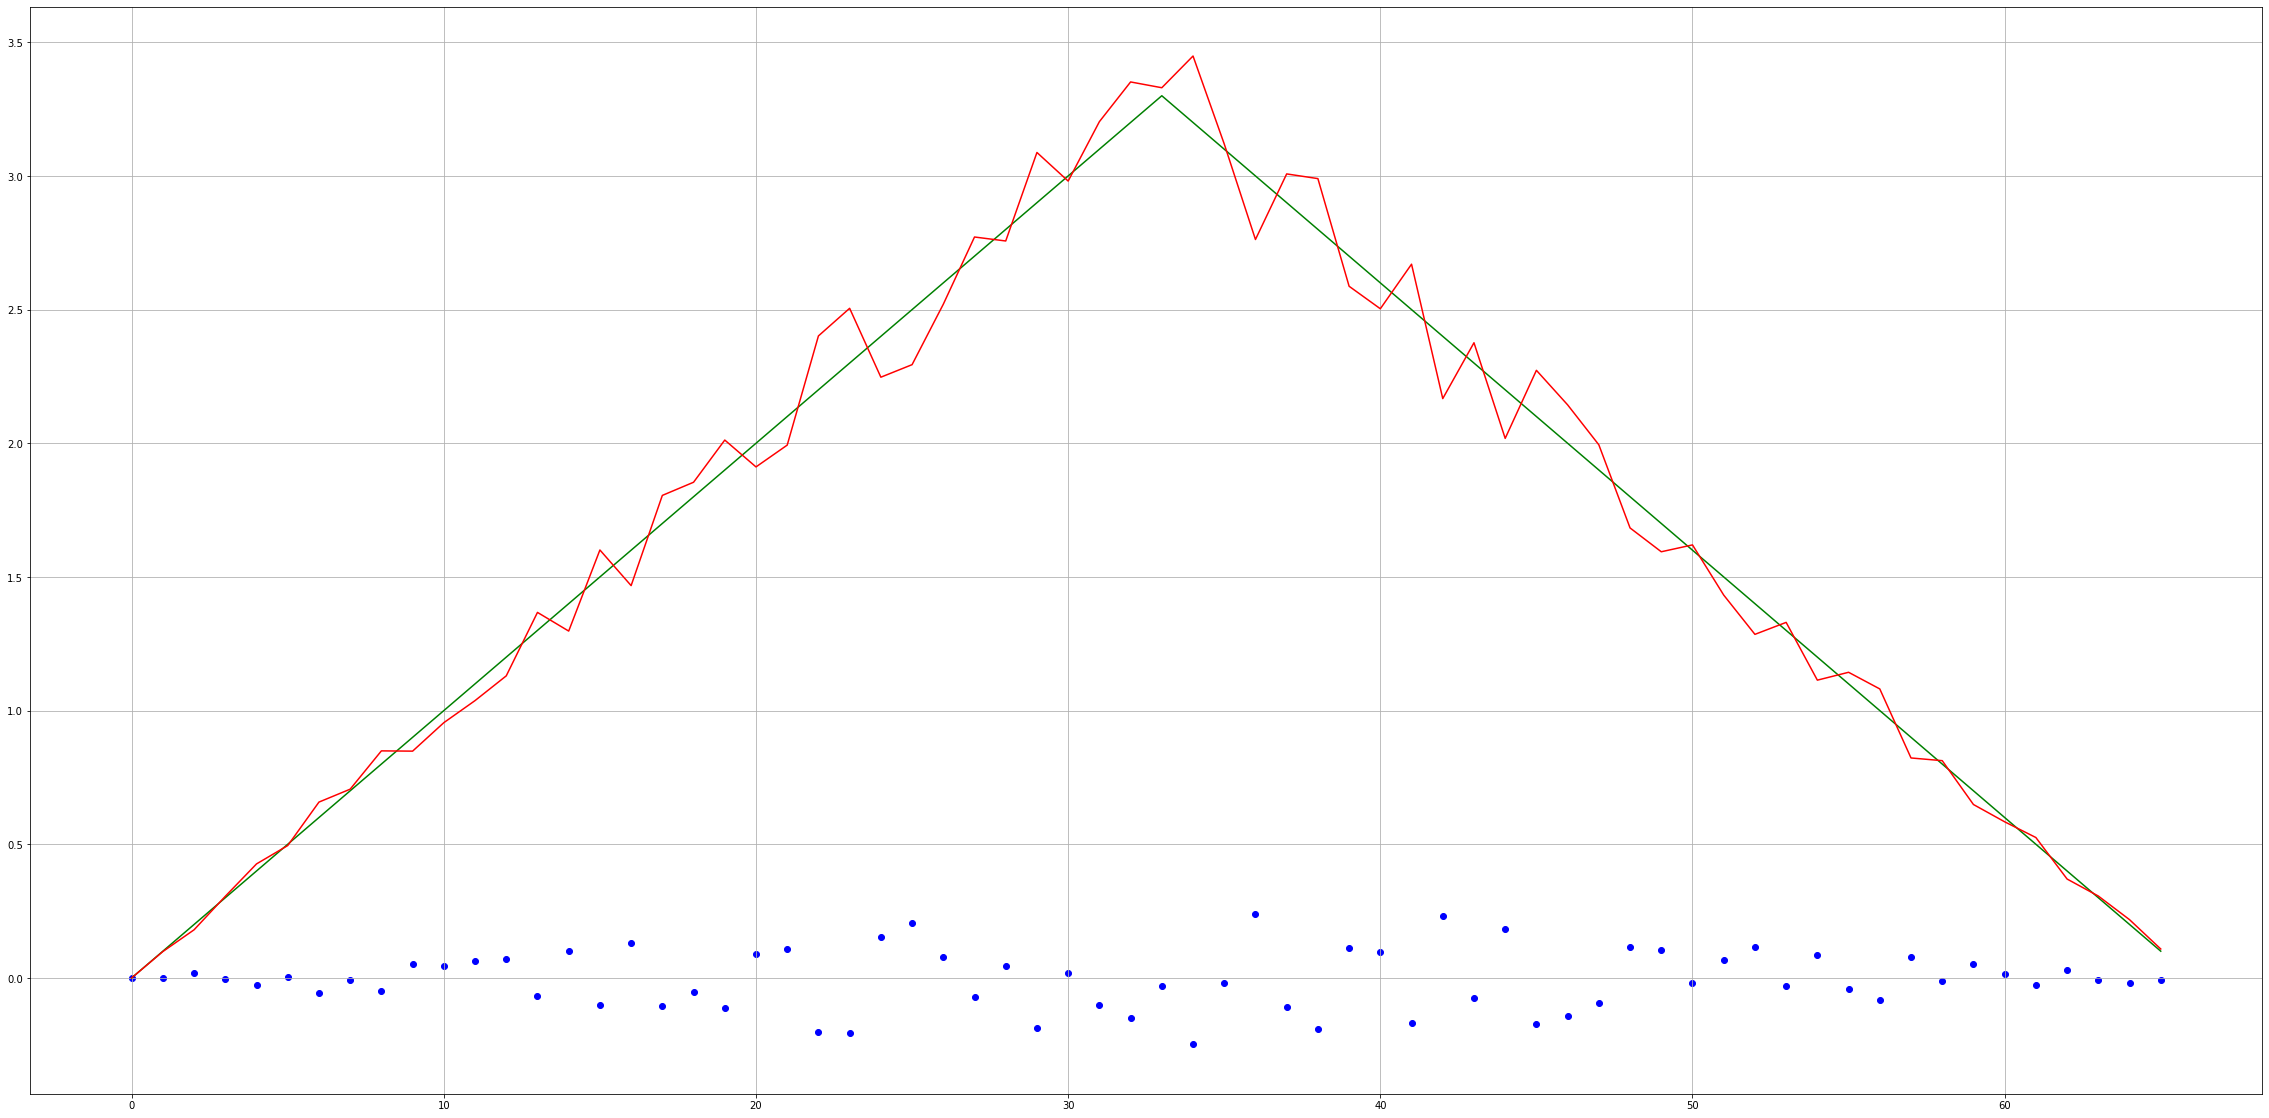

In [3]:
#plota os graficos de real x lido

plt.figure(figsize=(TAMANHO_GRAFICO))
plt.grid(True)
plt.plot(indice,real,color='green')
plt.plot(indice,lido,color='red')
plt.scatter(indice,real-lido,color='blue')


[[1.01453114]]
MAE = 0.012393
RMSE = 0.014521


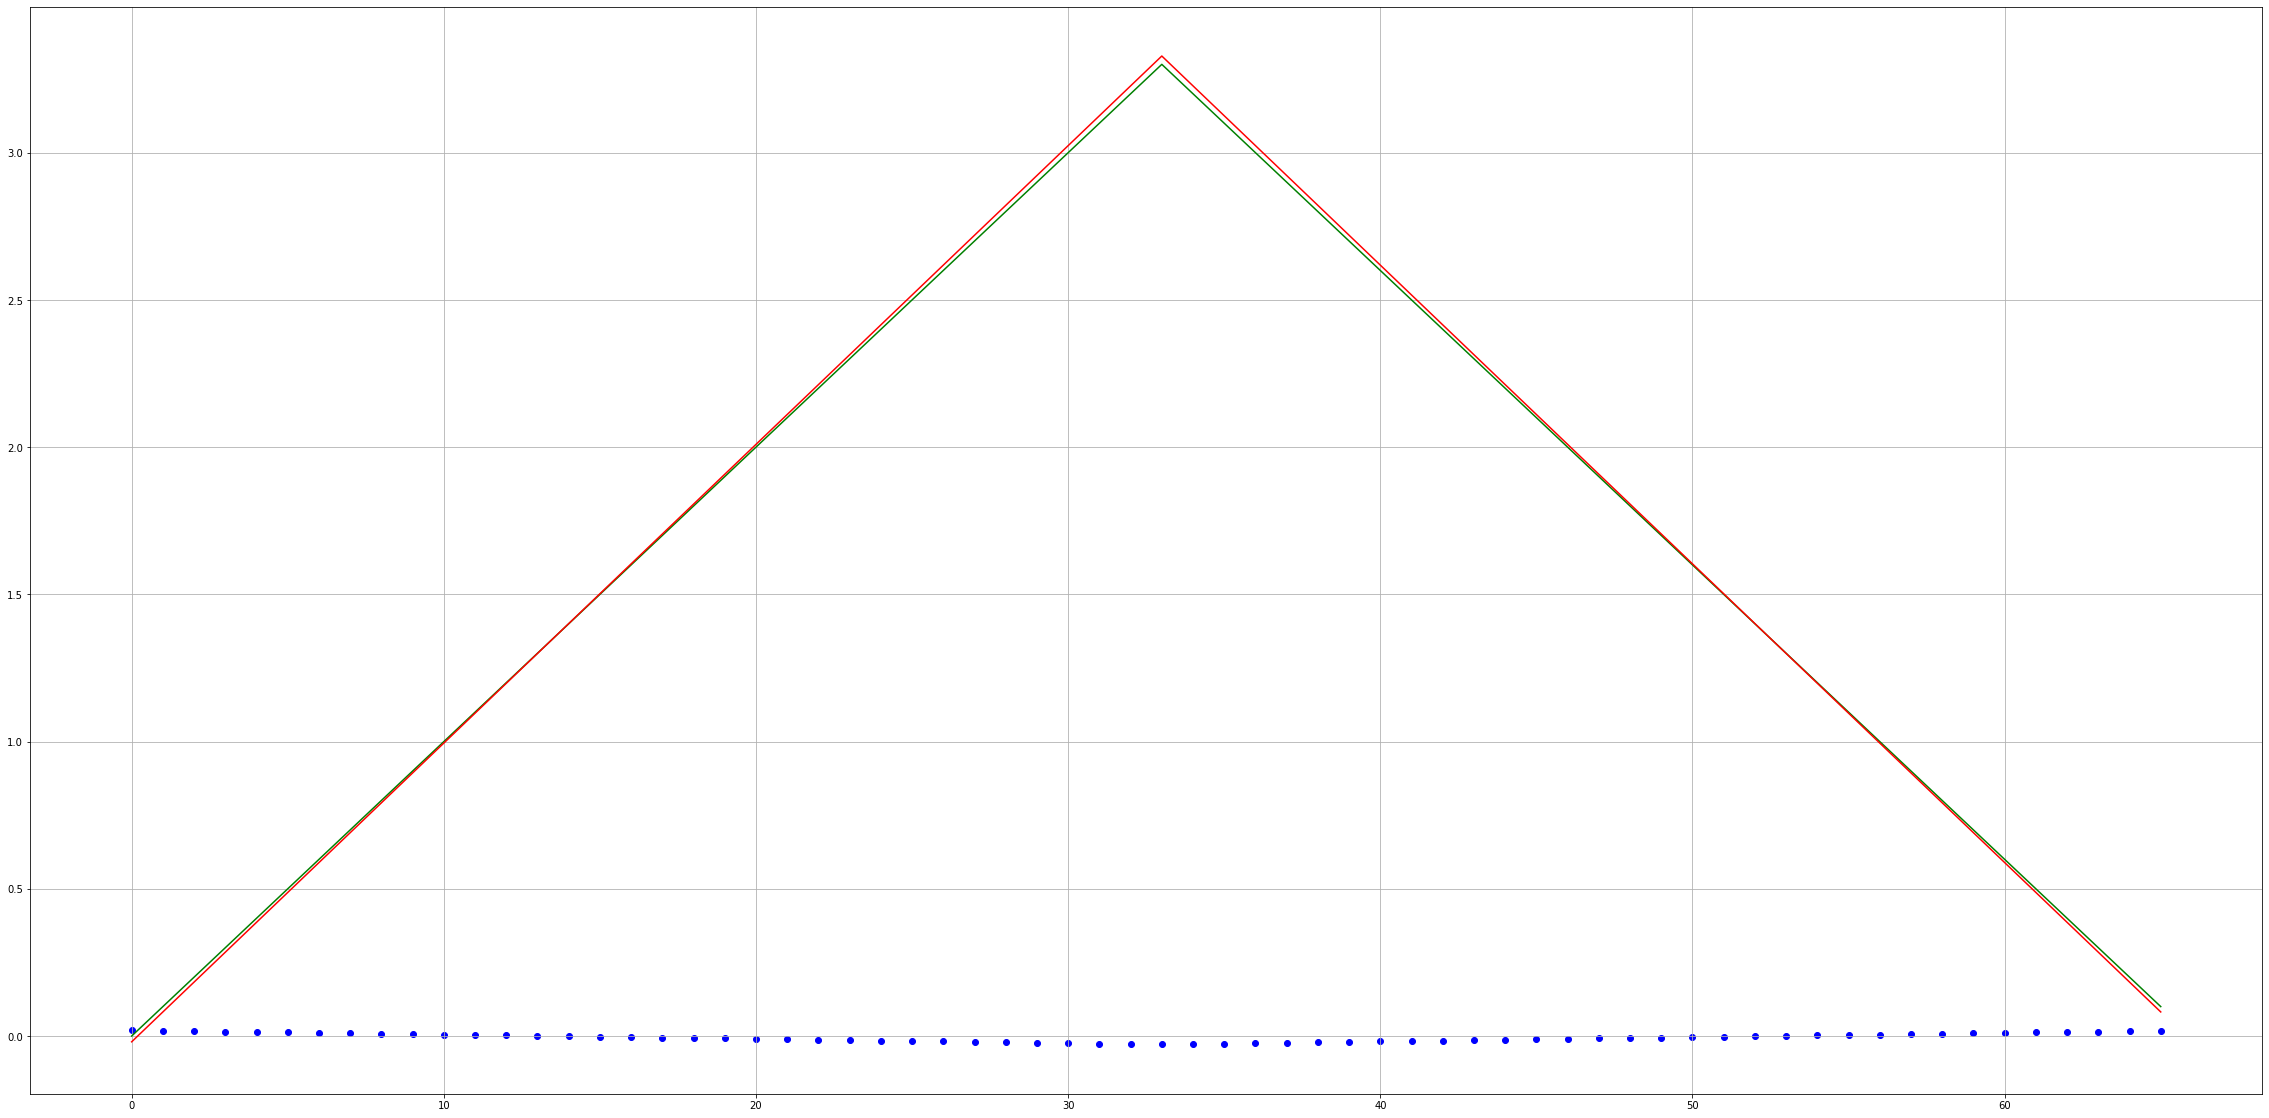

In [4]:
# regressao simples

real=real.reshape(-1,1)
lido=lido.reshape(-1,1)

modelln = linear_model.LinearRegression()
modelln.fit(real, lido)
pref=modelln.predict(real)


plt.figure(figsize=(TAMANHO_GRAFICO))
plt.grid(True)
plt.plot(indice,real,color='green')
plt.plot(indice,pref,color='red')
plt.scatter(indice,real-pref,color='blue')

print(modelln.coef_)
MAE=mean_absolute_error(pref,real)
RMSE=np.sqrt(mean_squared_error(pref,real))
print("MAE = {:04f}".format(MAE))
print("RMSE = {:04f}".format(RMSE))


[[ 0.          1.44148291 -1.3075461   1.44080863 -0.72606315  0.16895017
  -0.01459288]]
MAE = 0.017651
RMSE = 0.029428


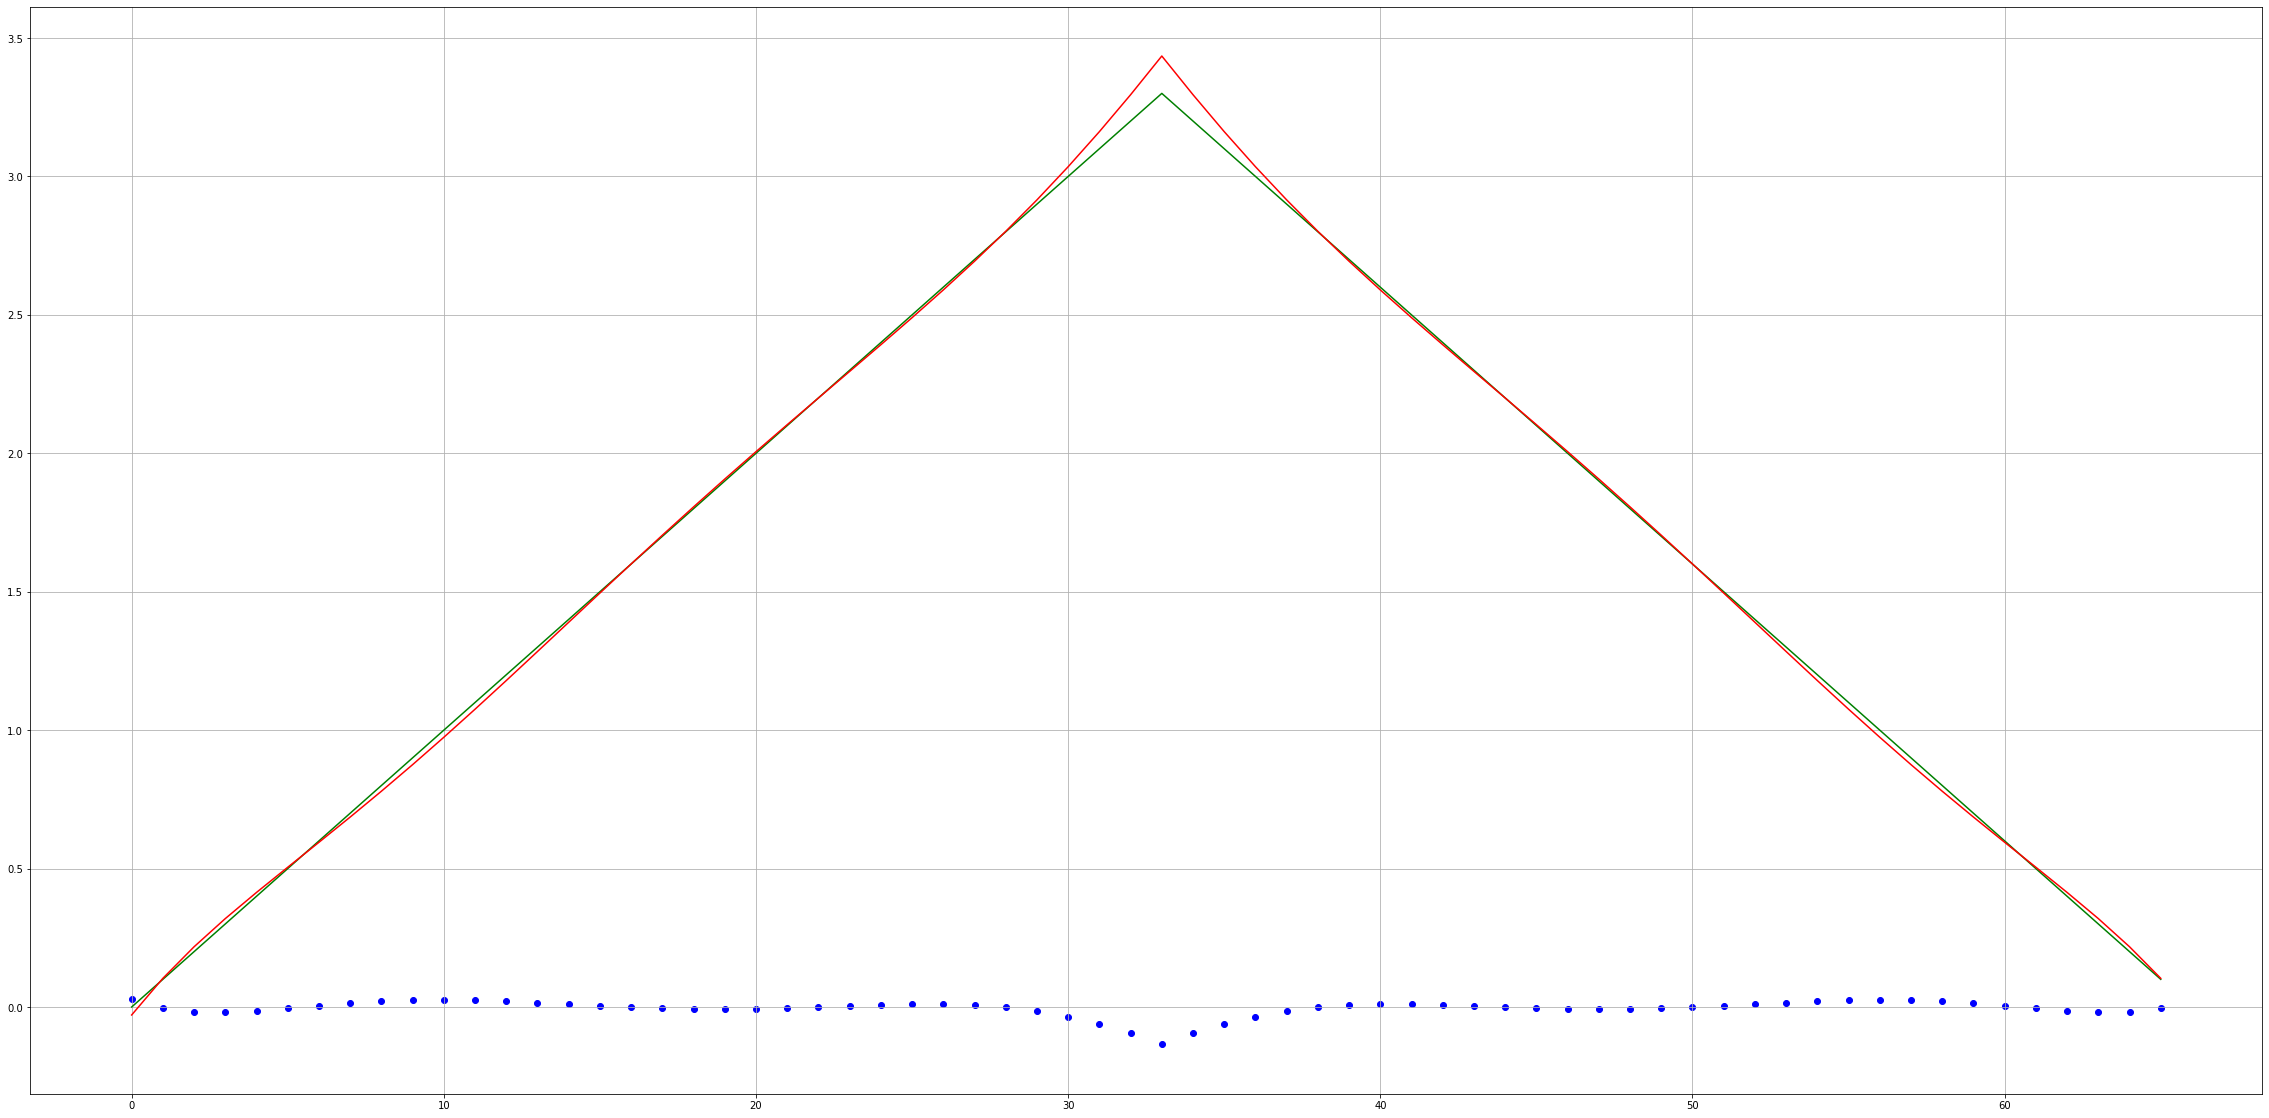

In [7]:
#regressao polinomial

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

poly2=PolynomialFeatures(degree=6)  # grau da regressao
realpoly=poly2.fit_transform(real)


modellnp = LinearRegression()
modellnp.fit(realpoly,lido)
pref=modellnp.predict(realpoly)


plt.figure(figsize=(TAMANHO_GRAFICO))
plt.grid(True)
plt.plot(indice,real,color='green')
plt.plot(indice,pref,color='red')
plt.scatter(indice,real-pref,color='blue')

print(modellnp.coef_)
MAE=mean_absolute_error(pref,real)
RMSE=np.sqrt(mean_squared_error(pref,real))
print("MAE = {:04f}".format(MAE))
print("RMSE = {:04f}".format(RMSE))
